# **Python EDA Project**

*Importing my python libraries for analysis and visualizations*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*Importing my dataset, and performing data cleaning*

In [23]:
path = (r"C:\Users\ADMIN PC\Downloads\DATASETS\retail_data.csv")
df = pd.read_csv(path)
df = df.drop(df.iloc[:, 20:58], axis=1)
df["total_price"] = (df["quantity"] * df["unit_price"] * (1 - df["discount_applied"])).round(2)
df.head()

,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,...,transaction_date,product_id,product_category,quantity,unit_price,discount_applied,payment_method,store_location,Unnamed: 58,total_price
0,1,56,Other,High,No,0,No,Divorced,3,Bachelor's,...,10/11/2020 10:08,1480,Electronics,8,49.72,0.50,Credit Card,Location A,NaN,198.88
1,2,69,Female,Medium,No,2,No,Married,2,PhD,...,12/8/2021 1:07,1597,Groceries,7,817.76,0.32,Credit Card,Location C,NaN,3892.54
2,3,46,Female,Low,No,5,No,Married,3,Bachelor's,...,2/17/2020 9:40,5142,Toys,8,270.30,0.35,Debit Card,Location A,NaN,1405.56
3,4,32,Female,Low,No,0,No,Divorced,2,Master's,...,8/13/2020 0:43,8447,Toys,2,547.84,0.10,Credit Card,Location A,NaN,986.11
4,5,60,Female,Low,Yes,7,Yes,Divorced,2,Bachelor's,...,7/2/2021 11:59,6025,Clothing,4,785.29,0.17,Mobile Payment,Location C,NaN,2607.16


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   customer_id         1000000 non-null  int64  
 1   age                 1000000 non-null  int64  
 2   gender              1000000 non-null  object 
 3   income_bracket      1000000 non-null  object 
 4   loyalty_program     1000000 non-null  object 
 5   membership_years    1000000 non-null  int64  
 6   churned             1000000 non-null  object 
 7   marital_status      1000000 non-null  object 
 8   number_of_children  1000000 non-null  int64  
 9   education_level     1000000 non-null  object 
 10  occupation          1000000 non-null  object 
 11  transaction_id      1000000 non-null  int64  
 12  transaction_date    1000000 non-null  object 
 13  product_id          1000000 non-null  int64  
 14  product_category    1000000 non-null  object 
 15  quantity        

In [5]:
df.describe()

,customer_id,age,membership_years,number_of_children,transaction_id,product_id,quantity,unit_price,discount_applied,Unnamed: 58,total_price
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,0.0,1000000.000000
mean,500000.500000,48.496605,4.497453,2.000554,499891.731447,4999.564515,5.002649,500.261317,0.249910,NaN,1878.310740
std,288675.278933,17.874381,2.872406,1.414214,288706.057652,2886.798391,2.583751,288.462860,0.144328,NaN,1628.487133
min,1.000000,18.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,NaN,0.540000
25%,250000.750000,33.000000,2.000000,1.000000,249878.750000,2498.000000,3.000000,250.310000,0.130000,NaN,577.430000
50%,500000.500000,49.000000,4.000000,2.000000,499559.500000,4999.000000,5.000000,500.410000,0.250000,NaN,1411.290000
75%,750000.250000,64.000000,7.000000,3.000000,750071.250000,7498.000000,7.000000,750.160000,0.370000,NaN,2778.540000
max,1000000.000000,79.000000,9.000000,4.000000,999999.000000,9999.000000,9.000000,1000.000000,0.500000,NaN,8999.370000


 # Customer Analysis

*Age analysis based on customers gender*

In [6]:
age_analysis= df.groupby('gender')['age'].mean()
age_analysis

gender
Female    48.486561
Male      48.524015
Other     48.479337
Name: age, dtype: float64

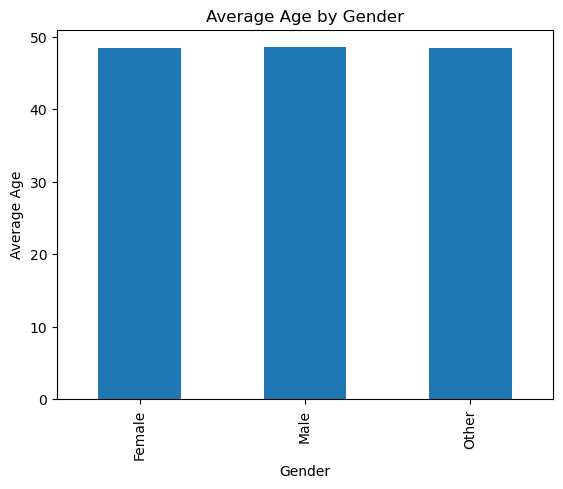

In [7]:
age_analysis.plot(kind='bar')
plt.title('Average Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.show()

*Customer income analysis*

In [8]:
income_analysis = df.groupby('income_bracket')['customer_id'].count()
income_analysis

income_bracket
High      333612
Low       333021
Medium    333367
Name: customer_id, dtype: int64

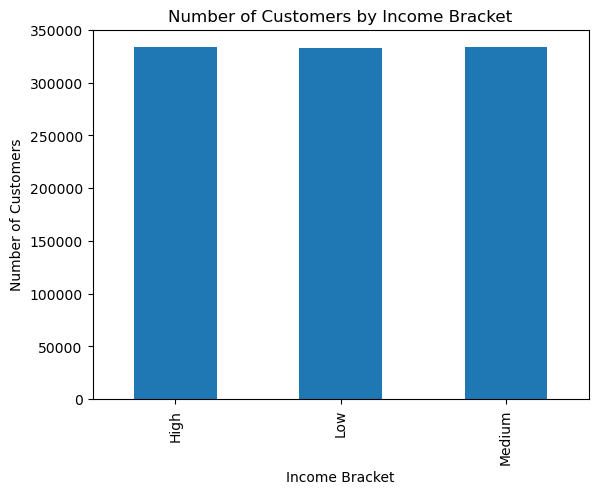

In [9]:
income_analysis.plot(kind='bar')
plt.title('Number of Customers by Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Number of Customers')
plt.show()

*Loyalty Program analysis*

In [10]:
loyalty_analysis = df.groupby('loyalty_program')['customer_id'].count()
loyalty_analysis

loyalty_program
No     500288
Yes    499712
Name: customer_id, dtype: int64

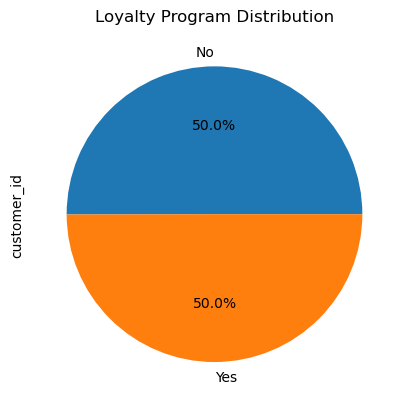

In [11]:
loyalty_analysis.plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Loyalty Program Distribution')
plt.show()

*Customer martial analysis*

In [12]:
martial_analysis = df.groupby('marital_status')['customer_id'].count()
martial_analysis

marital_status
Divorced    333816
Married     333234
Single      332950
Name: customer_id, dtype: int64

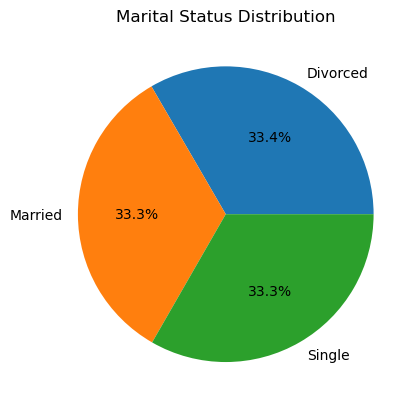

In [13]:
martial_analysis.plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Marital Status Distribution')
plt.ylabel("")
plt.show()

***Customer education analysis***

In [14]:
education_analysis = df.groupby('education_level')['customer_id'].count()
education_analysis

education_level
Bachelor's     250360
High School    250105
Master's       249456
PhD            250079
Name: customer_id, dtype: int64

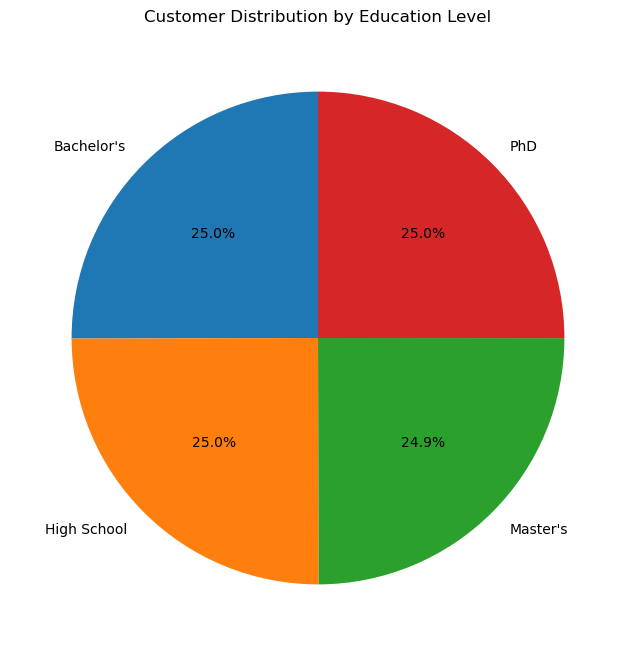

In [15]:
education_analysis.plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8), startangle=90)
plt.ylabel("")
plt.title("Customer Distribution by Education Level")
plt.show()


In [18]:
occupation_analysis = df.groupby('occupation')['customer_id'].count()
occupation_analysis

occupation
Employed         250857
Retired          249085
Self-Employed    249941
Unemployed       250117
Name: customer_id, dtype: int64

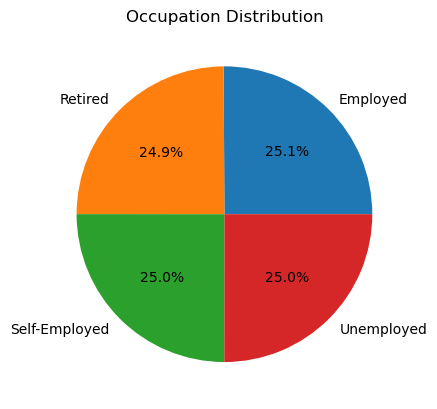

In [19]:
occupation_analysis.plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Occupation Distribution')
plt.ylabel("")
plt.show()

In [31]:
store_perf = df.groupby('store_location')['total_price'].mean()
store_perf

store_location
Location A    1878.073512
Location B    1876.974254
Location C    1879.667949
Location D    1878.527726
Name: total_price, dtype: float64

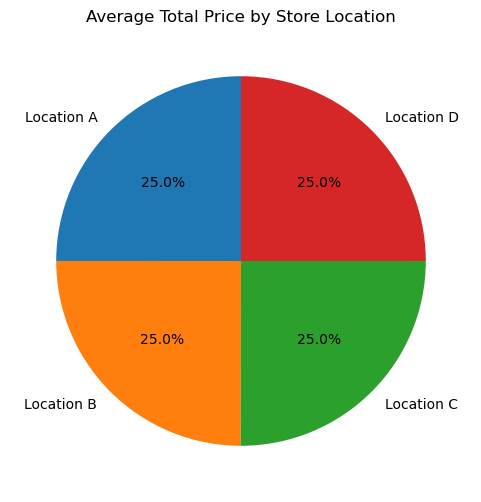

In [33]:
store_perf.plot(kind="pie", autopct="%1.1f%%", figsize=(6, 6), startangle=90)  
plt.ylabel("")   
plt.title("Average Total Price by Store Location")  
plt.show()

## Product Analysis

In [28]:
product_analysis = df.groupby('product_category')['total_price'].sum()
product_analysis

product_category
Clothing       3.762637e+08
Electronics    3.747965e+08
Furniture      3.731242e+08
Groceries      3.772420e+08
Toys           3.768844e+08
Name: total_price, dtype: float64

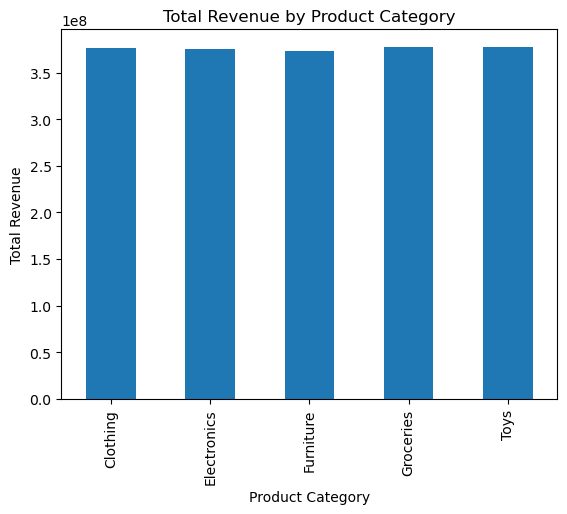

In [20]:
product_analysis.plot(kind="bar")
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   customer_id         1000000 non-null  int64  
 1   age                 1000000 non-null  int64  
 2   gender              1000000 non-null  object 
 3   income_bracket      1000000 non-null  object 
 4   loyalty_program     1000000 non-null  object 
 5   membership_years    1000000 non-null  int64  
 6   churned             1000000 non-null  object 
 7   marital_status      1000000 non-null  object 
 8   number_of_children  1000000 non-null  int64  
 9   education_level     1000000 non-null  object 
 10  occupation          1000000 non-null  object 
 11  transaction_id      1000000 non-null  int64  
 12  transaction_date    1000000 non-null  object 
 13  product_id          1000000 non-null  int64  
 14  product_category    1000000 non-null  object 
 15  quantity        